## Parkinson's Disease Detection  


## Dataset Description

The dataset is related to Parkinson's disease detection and includes the following features:

1. **Number of Samples and Features**: 
   - **Rows (samples)**: 195
   - **Columns (features)**: 24

2. **Features**:
   - **name**: Identifiers for each sample.
   - **MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz)**: Measures of fundamental frequency, highest, and lowest frequency, respectively.
   - **Jitter and Shimmer metrics**: Measures of variation in pitch and amplitude.
   - **NHR (Noise-to-Harmonics Ratio)** and **HNR (Harmonics-to-Noise Ratio)**: Indicators of the voice signal quality.
   - **status**: Target variable indicating Parkinson's disease (1) or healthy (0).
   - **RPDE, DFA, spread1, spread2, D2, PPE**: Non-linear dynamical complexity measures and signal processing parameters.

3. **Target Variable**:
   - **status**: Binary classification indicating if the subject has Parkinson's (1) or not (0). Approximately 75% of the samples correspond to individuals with Parkinson's disease.

4. **Statistical Summary**:
   - Many features are numerical, with varying scales and distributions. For example:
     - **MDVP:Fo(Hz)** ranges from 88.33 to 260.10 with a mean of 154.23.
     - **HNR** ranges from 8.44 to 33.04 with a mean of 21.89.

5. **Purpose**:
   - This dataset is designed to classify individuals into Parkinson's or healthy categories based on vocal features, aiding in early detection of the disease.



**Importing the necessary libraries**

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import norm

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data and visualization


In [2]:
# Laod the data 
parkinsons_data= pd.read_csv('/kaggle/input/parkinson/parkinsons.csv')


In [3]:

parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:

parkinsons_data.shape

(195, 24)

In [5]:
#Get info about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
#Check if there is null values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
#Get descrition of the dataset , min ; max , mean count etc ..
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
#  **T** the target Variable in the dataset is the status  indicating if the subject has Parkinson's (1) or not (0)
parkinsons_data['status'].value_counts()


status
1    147
0     48
Name: count, dtype: int64

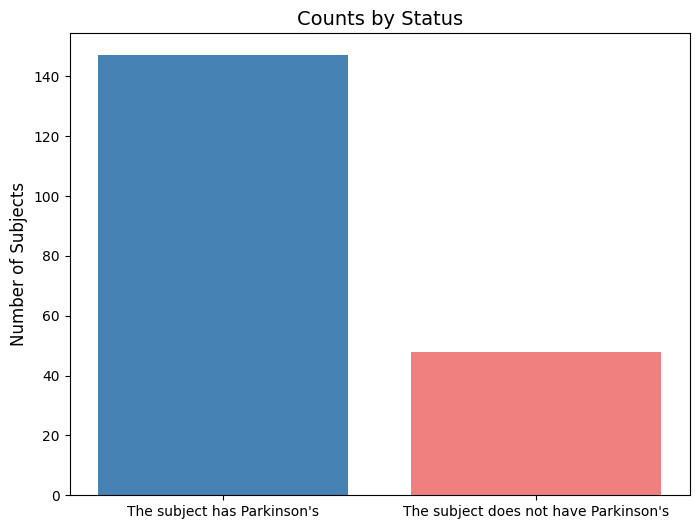

In [9]:
# Plotting the distribution of the 'status' column
has_Parkinson = parkinsons_data['status'].value_counts()[1]
has_not_Parkinson = parkinsons_data['status'].value_counts()[0]

# Creating a bar plot for the counts by status
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(
    ["The subject has Parkinson's", "The subject does not have Parkinson's"],
    [has_Parkinson, has_not_Parkinson],
    color=['steelblue', 'lightcoral']
)
ax.set_ylabel("Number of Subjects", fontsize=12)
ax.set_title("Counts by Status", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**La fonction cloche représentant la distribution des features de la base de données**

columns in the dataset: Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


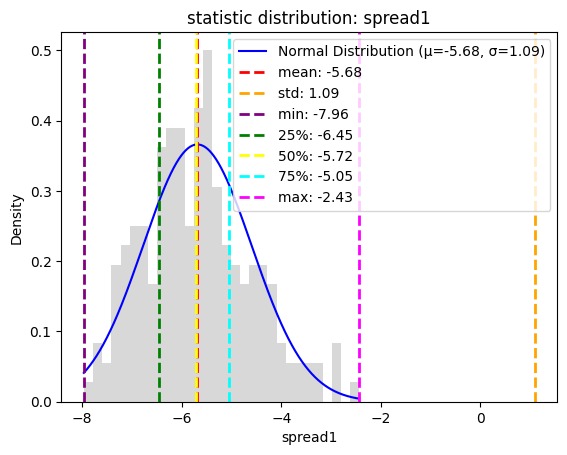

In [10]:
parkinsons_data = pd.read_csv('/kaggle/input/parkinson/parkinsons.csv')
print("columns in the dataset:", parkinsons_data.columns)
stats = parkinsons_data.describe()

colonne = 'spread1' 
if colonne in parkinsons_data.columns:
    data = parkinsons_data[colonne]

    # Plot the histogram to visualize the distribution
    plt.hist(data, bins=30, alpha=0.3, color='gray', density=True)

    # Tracer la courbe de la distribution normale
    x = np.linspace(data.min(), data.max(), 1000)
    mu = stats.at['mean', colonne]
    sigma = stats.at['std', colonne]
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    plt.plot(x, y, label=f'Normal Distribution (µ={mu:.2f}, σ={sigma:.2f})', color='blue')

    
    colors = {
        'mean': 'red',
        'std': 'orange',
        'min': 'purple',
        '25%': 'green',
        '50%': 'yellow',
        '75%': 'cyan',
        'max': 'magenta'
    }

    for stat in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
        value = stats.at[stat, colonne]
        plt.axvline(value, color=colors[stat], linestyle='--', linewidth=2, label=f'{stat}: {value:.2f}')


    plt.title(f'statistic distribution: {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print(f" the column  '{colonne}' doesnt exist ")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


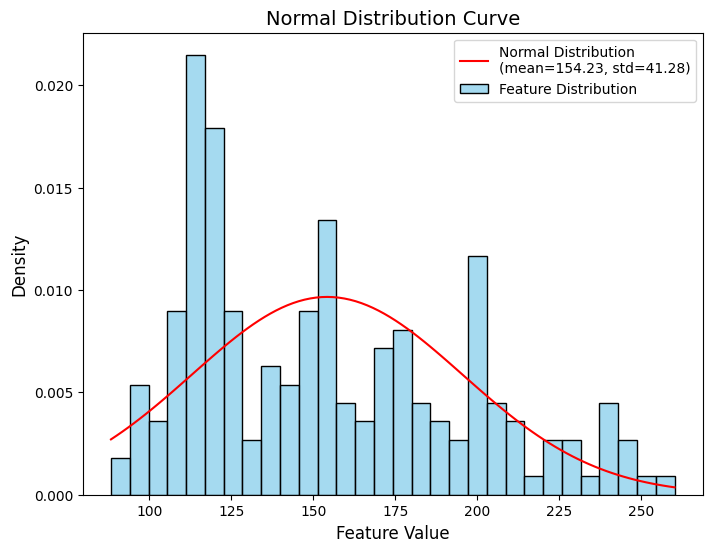

In [11]:
# Extracting a feature for demonstration (e.g., 'MDVP:Fo(Hz)')
feature = parkinsons_data['MDVP:Fo(Hz)']

# Calculating the mean and standard deviation of the feature
mean, std = norm.fit(feature)

# Creating a range of values for the normal distribution
x = np.linspace(feature.min(), feature.max(), 100)

# Generating the normal distribution curve
pdf = norm.pdf(x, mean, std)

# Plotting the feature histogram and normal distribution curve
plt.figure(figsize=(8, 6))
sns.histplot(feature, kde=False, stat="density", bins=30, color="skyblue", label="Feature Distribution")
plt.plot(x, pdf, 'r-', label=f"Normal Distribution\n(mean={mean:.2f}, std={std:.2f})")
plt.title("Normal Distribution Curve", fontsize=14)
plt.xlabel("Feature Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='status', ylabel='Density'>

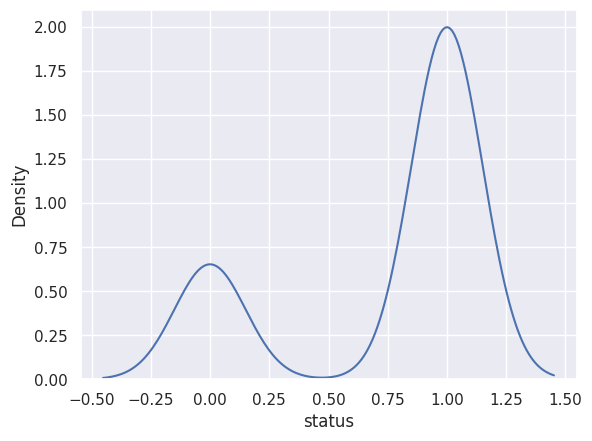

In [12]:
import seaborn as sns
sns.set()
sns.kdeplot(parkinsons_data['status'])


# 2.Data Preprocessing: 

**Separating labels and features**
- Label (status): Binary classification (1 = Parkinson's, 0 = Healthy).
- Features: All other columns provide measurable attributes derived from vocal recordings that can be used to predict the presence of Parkinson's disease.

In [14]:
X= parkinsons_data.drop(columns=['name','status','MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)'], axis=1)
Y= parkinsons_data ['status']

In [15]:
print(X) #features

     MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  \
0          74.997         0.00784           0.00007   0.00370   0.00554   
1         113.819         0.00968           0.00008   0.00465   0.00696   
2         111.555         0.01050           0.00009   0.00544   0.00781   
3         111.366         0.00997           0.00009   0.00502   0.00698   
4         110.655         0.01284           0.00011   0.00655   0.00908   
..            ...             ...               ...       ...       ...   
190        94.261         0.00459           0.00003   0.00263   0.00259   
191        89.488         0.00564           0.00003   0.00331   0.00292   
192        74.287         0.01360           0.00008   0.00624   0.00564   
193        74.904         0.00740           0.00004   0.00370   0.00390   
194        77.973         0.00567           0.00003   0.00295   0.00317   

     Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0       0.01109     

In [16]:
print(Y) #labels

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state =2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(195, 20) (156, 20) (39, 20)


Standardiser les données

**Standardizing Data**

Standardizing data involves transforming the features of your dataset so that they have a mean of 0 and a standard deviation of 1. This is particularly useful in machine learning when algorithms are sensitive to the scale of the data, such as regression methods, neural networks, or classification methods based on distances .

**Why Standardize Data?**
Uniform Scale: In a dataset, features can have vastly different scales (e.g., income in thousands of euros and age in years). Machine learning algorithms that compute distances (like k-means or SVM) can be biased by these differences in scale.

Improved Convergence: For some algorithms (e.g., neural networks), standardization can improve the speed of convergence during training.

Interpretability: Coefficients in linear regression, for instance, are more easily comparable when the data has been standardized.



In [31]:
# Initialize StandardScaler
scaler = StandardScaler()
# Fit the scaler only on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transform X_test using the scaler fitted on X_train
X_test_scaled = scaler.transform(X_test)


# 3 Machine Learning 

**Train our model using the SVM method (Support Vector Machine)** :The purpose of training a model using SVM (Support Vector Machine) is to create a decision boundary that best separates the data into different classes. SVM is a powerful supervised learning algorithm commonly used for classification and regression tasks

In [33]:
model = svm.SVC(kernel='linear')

In [34]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [45]:
#initializes the SVM model with a linear kernel
model = SVC(kernel='linear')

#Trains the SVM model on the standardized training dat
model.fit(X_train_scaled, y_train)

#Calculates the accuracy of the model 
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))

print('Accuracy score of training data:', train_accuracy)
print('Accuracy score of test data:', test_accuracy)



Accuracy score of training data: 0.9038461538461539
Accuracy score of test data: 0.8717948717948718


In [44]:
##############################################################################################################
#Input Example for Prediction:This tuple represents an example of a single patient's features. Each value corresponds to a specific feature from the dataset 
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

#Converts the tuple input_data into a NumPy array for compatibility with the model and the scaler.
input_data_as_numpy_array = np.asarray(input_data)
# Reshape the data 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# Standardisation 
std_data = scaler.transform(input_data_reshaped)
# Prediction of the model
prediction = model.predict(std_data)

#Display the prediction result 
print(prediction)
if prediction[0] == 0:
    print("Person without Parkinson")
else:
    print("Person with Parkinson")

[0]
Person without Parkinson


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


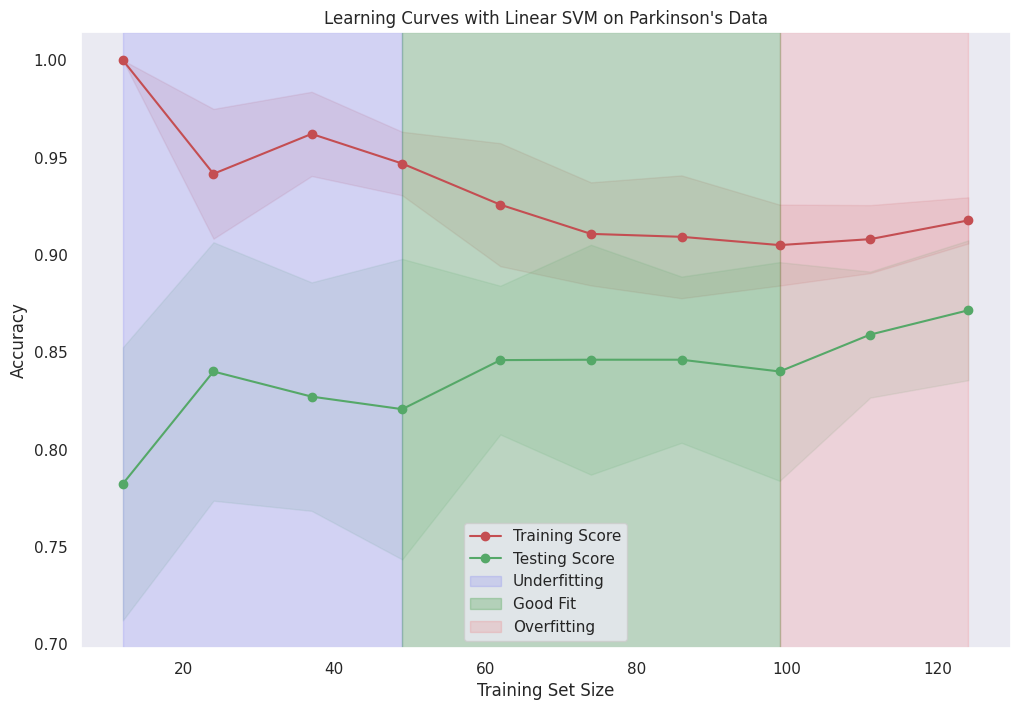

In [51]:
from sklearn.model_selection import learning_curve

# Load the Parkinson's dataset
donnees_parkinson = pd.read_csv('/kaggle/input/parkinson/parkinsons.csv')  # Load the dataset from the specified path

# Prepare features (X) and labels (y), EXCLUDING non-numeric columns
X = donnees_parkinson.select_dtypes(include=[np.number]).drop(columns=['status'], axis=1)  # Drop the 'status' column from features
y = donnees_parkinson['status']  # Define the target variable

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale the features to have a mean of 0 and a standard deviation of 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Initialize the SVM model
modele = SVC(kernel='linear')  # Create an SVM classifier with a linear kernel

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    modele,              # The model to evaluate
    X_train,             # Training data
    y_train,             # Training labels
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # Metric to evaluate (accuracy)
    n_jobs=-1,           # Use all available CPU cores for computation
    train_sizes=np.linspace(0.1, 1.0, 10)  # Use 10 different training set sizes from 10% to 100%
)

# Calculate the mean and standard deviation of training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)  # Mean training accuracy for each training size
train_scores_std = np.std(train_scores, axis=1)    # Standard deviation of training accuracy
test_scores_mean = np.mean(test_scores, axis=1)    # Mean testing accuracy for each training size
test_scores_std = np.std(test_scores, axis=1)      # Standard deviation of testing accuracy

# Plot the learning curves
plt.figure(figsize=(12, 8))  # Set the figure size
plt.grid()  # Add a grid for better readability

# Plot training scores with shaded area for standard deviation
plt.fill_between(
    train_sizes, 
    train_scores_mean - train_scores_std, 
    train_scores_mean + train_scores_std, 
    alpha=0.1, color="r"  # Red shaded area for training scores
)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")  # Training score line

# Plot testing scores with shaded area for standard deviation
plt.fill_between(
    train_sizes, 
    test_scores_mean - test_scores_std, 
    test_scores_mean + test_scores_std, 
    alpha=0.1, color="g"  # Green shaded area for testing scores
)
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Score")  # Testing score line

# Highlight areas for underfitting, good fit, and overfitting
plt.axvspan(train_sizes[0], train_sizes[3], color='blue', alpha=0.1, label='Underfitting')  # Small training sizes (underfitting)
plt.axvspan(train_sizes[3], train_sizes[7], color='green', alpha=0.2, label='Good Fit')     # Balanced region (good fit)
plt.axvspan(train_sizes[7], train_sizes[-1], color='red', alpha=0.1, label='Overfitting')   # Large training sizes (overfitting)

# Add labels and titles
plt.xlabel("Training Set Size")  # X-axis label
plt.ylabel("Accuracy")           # Y-axis label
plt.title("Learning Curves with Linear SVM on Parkinson's Data")  # Title
plt.legend(loc="best")           # Show the legend at the best position

# Display the plot
plt.show()


**Lets try another scaling techniques like MinMaxScaler or RobustScaler and compare how it will impact the model performance.**

In [55]:
from sklearn.preprocessing import RobustScaler
# Fit the RobustScaler on the training data
transformer = RobustScaler().fit(X_train)

# Transform both the training and test data using the same scaler ( you should notfit the scaler on X_test)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)


print("The X_train:\n", X_train)
print("The X_train_scaled:\n", X_train_scaled)
print("X_test_scaled:\n", X_test_scaled)


The X_train:
 [[-0.81573501 -0.72260943 -0.05845772 ...  0.87269181 -0.50879471
   1.68235407]
 [-1.06035881 -0.76152167 -0.2481159  ...  1.14835657  0.65467856
   0.24216103]
 [-0.38849721  0.07031906 -0.75984512 ... -0.79627423 -0.76316314
   0.2596606 ]
 ...
 [-0.14428519 -0.35192961  0.59835436 ... -1.66687868 -0.09818882
  -0.22319611]
 [-0.1474099  -0.45062926  0.43115662 ...  0.17266944  1.21336615
  -0.15376523]
 [-0.36345106  4.26776648 -1.15567853 ...  0.53046987  0.80952792
   2.65021461]]
The X_train_scaled:
 [[-4.22853743e-01 -4.41080118e-01  1.25825697e-01 ...  8.35013628e-01
  -2.87835005e-01  1.45491476e+00]
 [-5.74966016e-01 -4.82149828e-01 -2.46133043e-02 ...  1.07245154e+00
   5.27729331e-01  3.62719436e-01]
 [-1.57188205e-01  3.95812069e-01 -4.30522690e-01 ... -6.02514359e-01
  -4.66140622e-01  3.75990534e-01]
 ...
 [-5.33198778e-03 -4.98480560e-02  6.46816442e-01 ... -1.35239076e+00
  -1.10153591e-05  9.80778844e-03]
 [-7.27500028e-03 -1.54020084e-01  5.14193307e-0

**Lets try another Machine learning Different Models**

In [58]:
from sklearn import linear_model
#Initialize the Model : Select a machine learning algorithm 
model_logistic = linear_model.LogisticRegression()
#Train the Model : This is where the model learns from the data.
model_logistic.fit(X_train,Y_train)
#Make Predictions : Use the trained model to predict outcomes for both the training data and the test data.
y_train_pred = model_logistic.predict(X_train)
y_test_pred = model_logistic.predict(X_test)
#Evaluate the Model:Use evaluation metrics to assess the model's performance like MAE , MSE ,RMSE ,Coefficient of Determination
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}, R2: {train_r2}")
print(f"Test MSE: {test_mse}, R2: {test_r2}")


Training MSE: 0.3076923076923077, R2: -0.5881230116648994
Test MSE: 0.28205128205128205, R2: -0.9151785714285716


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9487179487179487
